Nama : Randi Julian Saputra

Github : github.com/randiijulian

Dataset :

## Project Submission 2 Dicoding Machine Learning Terapan
**Recommender System**

---

Pada project Machine Learning saya membuat Recommender System mengenai pencarian buku berdasarkan preferensi pengguna dan rating yang diberikan pengguna sebelumnya. Perpustakaan sudah merambah ke ranah digital. Keberadaan sistem informasi perpustakaan di perguruan tinggi dapat  dirasakan telah  memudahkan para  pengunjung, baik mahasiswa maupun dosen, dalam  mencari bahan referensi yang  menjadi  koleksi perpustakaan  dimaksud.

Proyek ini berguna ketika pengunjung perpustakaan kampus menelusuri judul buku dan judul buku terkait tidak tersedia dan tidak adanya rekomendasi untuk buku-buku lain   yang mungkin menarik untuk dibaca atau bahkan dibutuhkan  sebagai pelengkap dari judul buku yang diinginkan, maka peran sistem rekomendasi disini sangat dibutuhkan. Rekomendasi tersebut bisa berdasarkan preferensi pengunjung dan rating yang diberikan pengunjung sebelumnya.

[Referensi terkait](http://jurnal.iaii.or.id/index.php/RESTI/article/view/971/158)

**Connect to drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System"

/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System


**Import needed library and module**

In [3]:
!pip install tensorflow

**Load Dataset**
Install kaggle and using kaggle API for import public dataset from kaggle

In [5]:
!pip install -U -q kaggle # install kaggle for using kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # use API kaggle for import file from kaggle
# download file from kaggle and place to folder dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset -p "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset"
!ls

book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset  Model	Notebooks


unzip file and place to folder dataset

In [6]:
!unzip "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/book-recommendation-dataset.zip" -d "/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/"

## Data Understanding

---



### Atribut Tiap Dataset

#### Book Atribute

In [4]:
import pandas as pd
book = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Books.csv")
book

<ipython-input-4-8d1419cada06>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Deskripsi variabel pada dataset book

In [5]:
book.info()
book.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


#### Rating Atribute

In [6]:
import pandas as pd
rating = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Ratings.csv")
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Deskripsi variabel pada dataset rating

In [7]:
rating.info()
rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


#### User Atribute

In [8]:
import pandas as pd
user = pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Dicoding/ML Terapan/Recommender System/Dataset/Users.csv")
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Deskripsi variabel pada dataset user

In [9]:
user.info()
user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Mengambil sampel dataset yang akan digunakan untuk training dan evaluasi dengan rasio 25% pada tiap dataset yang digunakan

In [10]:
book = book.sample(frac=0.25)
user = user.sample(frac=0.25)
rating = rating.sample(frac=0.25)

Melakukan penghapusan Image Url pada dataset book

In [11]:
book = book.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=0)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
109344,1572490063,Leader of the Charge: A Biography of General G...,Edward G. Longacre,1995,White Mane Pub
226836,0373166184,Cowboy And The Centerfold (Valentine'S Men) (H...,Debbi Rawlins,1996,Harlequin
152499,0139178074,Think on Your Feet: The Art of Thinking and Sp...,Kenneth Wydro,1981,Prentice Hall
92124,0486288005,Indian Why Stories,Frank Bird Linderman,1995,Dover Publications
82360,0312968930,Too Wicked To Love,Barbara Dawson Smith,1999,St. Martin's Paperbacks
...,...,...,...,...,...
254665,0688166768,"Turn Homeward, Hannalee",Patricia Beatty,1999,HarperTrophy
97496,0152588043,Orpheus,Charles Mikolaycak,1992,Harcourt
242534,0879016280,America's History 2e Vol 1 CHS: Psy 3/E,James A. Henretta,1993,Institute of Electrical &amp; Electronics Enginee
154551,0373764499,"Cowboy's Special Woman (Silhouette Desire, No....",Sara Orwig,2002,Silhouette


Drop data bernilai NaN pada tiap dataset yang digunakan

In [12]:
book.dropna(inplace=True)
rating.dropna(inplace=True)
user.dropna(inplace=True)

In [13]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
109344,1572490063,Leader of the Charge: A Biography of General G...,Edward G. Longacre,1995,White Mane Pub
226836,0373166184,Cowboy And The Centerfold (Valentine'S Men) (H...,Debbi Rawlins,1996,Harlequin
152499,0139178074,Think on Your Feet: The Art of Thinking and Sp...,Kenneth Wydro,1981,Prentice Hall
92124,0486288005,Indian Why Stories,Frank Bird Linderman,1995,Dover Publications
82360,0312968930,Too Wicked To Love,Barbara Dawson Smith,1999,St. Martin's Paperbacks
...,...,...,...,...,...
254665,0688166768,"Turn Homeward, Hannalee",Patricia Beatty,1999,HarperTrophy
97496,0152588043,Orpheus,Charles Mikolaycak,1992,Harcourt
242534,0879016280,America's History 2e Vol 1 CHS: Psy 3/E,James A. Henretta,1993,Institute of Electrical &amp; Electronics Enginee
154551,0373764499,"Cowboy's Special Woman (Silhouette Desire, No....",Sara Orwig,2002,Silhouette


In [14]:
rating

,User-ID,ISBN,Book-Rating
377134,91001,1857998650,5
922746,224764,0345452577,3
460914,110723,074350027X,0
1141321,274308,0440221595,0
439021,105058,0446611212,8
...,...,...,...
102000,23768,0446678457,0
706742,171506,0670892742,8
483757,115120,039493296X,0
977051,235105,0762409053,0


In [15]:
user

,User-ID,Location,Age
142402,142403,"spanaway, washington, usa",35.0
167117,167118,"tallahassee, florida, usa",20.0
68894,68895,"norderstedt, schleswig-holstein, germany",32.0
224934,224935,"gloucester, gloucestershire, united kingdom",25.0
19150,19151,"dublin, leinster, ireland",25.0
...,...,...,...
19000,19001,"huddinge, stockholm, sweden",36.0
49491,49492,"logroño, la rioja, spain",27.0
179525,179526,"pittsburgh, pennsylvania, usa",27.0
156750,156751,"london, ontario, canada",20.0


## Data Preparation

---



### Data Preprocessing

Melakukan perubahan pada kolom User-ID menjadi UserId karena tidak sesuai format inisialisasi variabel

In [16]:
dict = {'User-ID': 'UserId'
        }
# call rename () method
user.rename(columns=dict,
          inplace=True)

In [17]:
dict = {'User-ID': 'UserId'
        }
# call rename () method
rating.rename(columns=dict,
          inplace=True)

Melakukan penggabungan seluruh ISBN pada tabel user dan rating serta mengurutkan data dan menghapus data yang sama

In [18]:
import numpy as np

# Menggabungkan seluruh ISBN pada tabel users dan rating
book_n_rating = np.concatenate((
    book.ISBN.unique(),
    rating.ISBN.unique(),
))

# Mengurutkan data dan menghapus data yang sama
book_n_rating = np.sort(np.unique(book_n_rating))
print('Jumlah seluruh data buku berdasarkan ISBN: ', len(book_n_rating))

Jumlah seluruh data buku berdasarkan ISBN:  178131


Melakukan penggabungan seluruh UserID serta mengurutkan dan menghapus data yang sama

In [19]:
user_all = np.concatenate((
    user.UserId.unique(),
    rating.UserId.unique(),
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  82533


Menggabungkan dataframe rating dengan book_recommendation berdasarkan nilai ISBN

In [20]:
book_fix = pd.merge(rating, book , on='ISBN', how='left')
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,91001,1857998650,5,NaN,NaN,NaN,NaN
1,224764,0345452577,3,NaN,NaN,NaN,NaN
2,110723,074350027X,0,NaN,NaN,NaN,NaN
3,274308,0440221595,0,NaN,NaN,NaN,NaN
4,105058,0446611212,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,23768,0446678457,0,NaN,NaN,NaN,NaN
287441,171506,0670892742,8,NaN,NaN,NaN,NaN
287442,115120,039493296X,0,NaN,NaN,NaN,NaN
287443,235105,0762409053,0,NaN,NaN,NaN,NaN


Melakukan pengecekan missing value

In [21]:
book_fix.isnull().sum()

UserId                      0
ISBN                        0
Book-Rating                 0
Book-Title             225107
Book-Author            225107
Year-Of-Publication    225107
Publisher              225107
dtype: int64

In [22]:
book_fix.groupby('ISBN').sum()

<ipython-input-22-557ce50d40bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  book_fix.groupby('ISBN').sum()


,UserId,Book-Rating
ISBN,,
0330299891,181817,6
0586045007,89192,0
9032803328,89192,0
9044922564,89192,0
904492401X,89192,0
...,...,...
ZR903CX0003,285793,1
"\0210000010""",4377,8
"\0432534220""",276331,9


Mendefinisikan dataframe rating kedalam variabel book_rate

In [23]:
book_rate = rating
book_rate

,UserId,ISBN,Book-Rating
377134,91001,1857998650,5
922746,224764,0345452577,3
460914,110723,074350027X,0
1141321,274308,0440221595,0
439021,105058,0446611212,8
...,...,...,...
102000,23768,0446678457,0
706742,171506,0670892742,8
483757,115120,039493296X,0
977051,235105,0762409053,0


In [24]:
book_fix

,UserId,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,91001,1857998650,5,NaN,NaN,NaN,NaN
1,224764,0345452577,3,NaN,NaN,NaN,NaN
2,110723,074350027X,0,NaN,NaN,NaN,NaN
3,274308,0440221595,0,NaN,NaN,NaN,NaN
4,105058,0446611212,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,23768,0446678457,0,NaN,NaN,NaN,NaN
287441,171506,0670892742,8,NaN,NaN,NaN,NaN
287442,115120,039493296X,0,NaN,NaN,NaN,NaN
287443,235105,0762409053,0,NaN,NaN,NaN,NaN


Mengubah nama pada kolom dataset book_fix

In [25]:
dict = {'Book-Rating': 'rate',
        'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'year',
        'Publisher':'publisher'
        }
# call rename () method
book_fix.rename(columns=dict,
          inplace=True)

In [26]:
book_fix

,UserId,ISBN,rate,title,author,year,publisher
0,91001,1857998650,5,NaN,NaN,NaN,NaN
1,224764,0345452577,3,NaN,NaN,NaN,NaN
2,110723,074350027X,0,NaN,NaN,NaN,NaN
3,274308,0440221595,0,NaN,NaN,NaN,NaN
4,105058,0446611212,8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
287440,23768,0446678457,0,NaN,NaN,NaN,NaN
287441,171506,0670892742,8,NaN,NaN,NaN,NaN
287442,115120,039493296X,0,NaN,NaN,NaN,NaN
287443,235105,0762409053,0,NaN,NaN,NaN,NaN


Menggabungkan book_rate dengan dataframe book_fix berdasarkan ISBN

In [27]:
all_book_name = pd.merge(book_rate, book_fix[['ISBN','title','publisher']], on='ISBN', how='left')

all_book_name

,UserId,ISBN,Book-Rating,title,publisher
0,91001,1857998650,5,NaN,NaN
1,91001,1857998650,5,NaN,NaN
2,224764,0345452577,3,NaN,NaN
3,224764,0345452577,3,NaN,NaN
4,224764,0345452577,3,NaN,NaN
...,...,...,...,...,...
3683662,115120,039493296X,0,NaN,NaN
3683663,235105,0762409053,0,NaN,NaN
3683664,127129,0373834349,0,NaN,NaN
3683665,127129,0373834349,0,NaN,NaN


Melakukan inisialisasi variabel baru

In [28]:
book_all_fix = all_book_name
book_all_fix

,UserId,ISBN,Book-Rating,title,publisher
0,91001,1857998650,5,NaN,NaN
1,91001,1857998650,5,NaN,NaN
2,224764,0345452577,3,NaN,NaN
3,224764,0345452577,3,NaN,NaN
4,224764,0345452577,3,NaN,NaN
...,...,...,...,...,...
3683662,115120,039493296X,0,NaN,NaN
3683663,235105,0762409053,0,NaN,NaN
3683664,127129,0373834349,0,NaN,NaN
3683665,127129,0373834349,0,NaN,NaN


Melakukan pengecekan missing value pada book_all_fix

In [29]:
book_all_fix.isnull().sum()

UserId               0
ISBN                 0
Book-Rating          0
title          2976977
publisher      2976977
dtype: int64

Membersihkan data missing value pada book_clean_fix

In [30]:
book_clean_fix = book_all_fix.dropna()
book_clean_fix

,UserId,ISBN,Book-Rating,title,publisher
104,230522,1576731804,0,Stories for the Heart: 110 Stories to Encourag...,Multnomah Publishers@inc
238,231210,0553270222,0,The Haunted Mesa,Bantam
239,231210,0553270222,0,The Haunted Mesa,Bantam
240,231210,0553270222,0,The Haunted Mesa,Bantam
241,231210,0553270222,0,The Haunted Mesa,Bantam
...,...,...,...,...,...
3683628,251518,0440206154,8,Red Dragon,Dell Publishing Company
3683629,251518,0440206154,8,Red Dragon,Dell Publishing Company
3683630,251518,0440206154,8,Red Dragon,Dell Publishing Company
3683631,251518,0440206154,8,Red Dragon,Dell Publishing Company


Melakukan pengecekan kembali missing value pada book_clean_fix

In [31]:
book_clean_fix.isnull().sum()

UserId         0
ISBN           0
Book-Rating    0
title          0
publisher      0
dtype: int64

Mengurutkan buku berdasarkan ISBN kemudian memasukkannya kedalam fix_book_all

In [32]:
fix_book_all = book_clean_fix.sort_values('ISBN', ascending=True)
fix_book_all

,UserId,ISBN,Book-Rating,title,publisher
405369,85526,0001055607,8,Cereus Blooms At Night,Fairmount Books Ltd Remainders
2973272,130973,0001856367,9,The Collins Book of Ballet and Dance,HarperCollins Publishers
1916720,89514,0001952404,0,Friend Monkey,Collins
3132925,63714,0001953877,10,Collins guide to dinosaurs,Collins
3478054,166188,0001981307,0,The Cross Rabbit (Percy's Park),HarperCollins Publishers
...,...,...,...,...,...
3166923,164533,B000092Q0A,9,The Community of the Ark: A Visit to the Utopi...,Shepard Publications
1435664,112001,B0000T6KHI,10,Three Fates,Putnam Pub Group
3597376,52350,B0000X8HIE,6,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,PageTurner
2945905,100088,B00017IWGQ,0,Time's Eye,Ballantine


Mengecek jumlah fix_book_all berdasarkan ISBN

In [33]:
len(fix_book_all.ISBN.unique())

28789

Mengecek jumlah fix_book_all berdasarkan publisher

In [34]:
len(fix_book_all.publisher.unique())

4058

In [35]:
dict = {'Book-Rating': 'rate'}
# call rename () method
fix_book_all.rename(columns=dict,
          inplace=True)

In [36]:
fix_book_all

,UserId,ISBN,rate,title,publisher
405369,85526,0001055607,8,Cereus Blooms At Night,Fairmount Books Ltd Remainders
2973272,130973,0001856367,9,The Collins Book of Ballet and Dance,HarperCollins Publishers
1916720,89514,0001952404,0,Friend Monkey,Collins
3132925,63714,0001953877,10,Collins guide to dinosaurs,Collins
3478054,166188,0001981307,0,The Cross Rabbit (Percy's Park),HarperCollins Publishers
...,...,...,...,...,...
3166923,164533,B000092Q0A,9,The Community of the Ark: A Visit to the Utopi...,Shepard Publications
1435664,112001,B0000T6KHI,10,Three Fates,Putnam Pub Group
3597376,52350,B0000X8HIE,6,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,PageTurner
2945905,100088,B00017IWGQ,0,Time's Eye,Ballantine


In [37]:
#mengetahui rating buku lebih dari 8
fix_book_all[fix_book_all['rate'] >= 8]

,UserId,ISBN,rate,title,publisher
405369,85526,0001055607,8,Cereus Blooms At Night,Fairmount Books Ltd Remainders
2973272,130973,0001856367,9,The Collins Book of Ballet and Dance,HarperCollins Publishers
3132925,63714,0001953877,10,Collins guide to dinosaurs,Collins
3554648,200273,0002005018,8,Clara Callan,HarperFlamingo Canada
3554647,200273,0002005018,8,Clara Callan,HarperFlamingo Canada
...,...,...,...,...,...
2200686,269378,9871138148,9,Cien Anos de Soledad / One Hundred Years of So...,Debols!llo
558133,227195,9993677337,8,Day of the Jackal,Blackstone Audiobooks
3502058,179791,B00005N5J6,8,Dinosaur Summer,Warner Books
3166923,164533,B000092Q0A,9,The Community of the Ark: A Visit to the Utopi...,Shepard Publications


Membuat variabel preparation yang berisi dataframe fix_book_all kemudian mengurutkan bersarakan ISBN

In [38]:
preparation = fix_book_all
preparation.sort_values('ISBN')

,UserId,ISBN,rate,title,publisher
405369,85526,0001055607,8,Cereus Blooms At Night,Fairmount Books Ltd Remainders
2973272,130973,0001856367,9,The Collins Book of Ballet and Dance,HarperCollins Publishers
1916720,89514,0001952404,0,Friend Monkey,Collins
3132925,63714,0001953877,10,Collins guide to dinosaurs,Collins
3478054,166188,0001981307,0,The Cross Rabbit (Percy's Park),HarperCollins Publishers
...,...,...,...,...,...
3166923,164533,B000092Q0A,9,The Community of the Ark: A Visit to the Utopi...,Shepard Publications
1435664,112001,B0000T6KHI,10,Three Fates,Putnam Pub Group
3597376,52350,B0000X8HIE,6,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,PageTurner
2945905,100088,B00017IWGQ,0,Time's Eye,Ballantine


Membuang data duplikat pada variabel preparation

In [39]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,UserId,ISBN,rate,title,publisher
405369,85526,0001055607,8,Cereus Blooms At Night,Fairmount Books Ltd Remainders
2973272,130973,0001856367,9,The Collins Book of Ballet and Dance,HarperCollins Publishers
1916720,89514,0001952404,0,Friend Monkey,Collins
3132925,63714,0001953877,10,Collins guide to dinosaurs,Collins
3478054,166188,0001981307,0,The Cross Rabbit (Percy's Park),HarperCollins Publishers
...,...,...,...,...,...
3166923,164533,B000092Q0A,9,The Community of the Ark: A Visit to the Utopi...,Shepard Publications
1435664,112001,B0000T6KHI,10,Three Fates,Putnam Pub Group
3597376,52350,B0000X8HIE,6,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,PageTurner
2945905,100088,B00017IWGQ,0,Time's Eye,Ballantine


Melakukan konversi beberapa data series menjadi dalam bentuk list

In [40]:
book_isbn = preparation['ISBN'].tolist()

book_title = preparation['title'].tolist()

book_publisher = preparation['publisher'].tolist()

#cetak total
print(len(book_isbn))
print(len(book_title))
print(len(book_publisher))

28789
28789
28789


Membuat dictionary untuk data "book_id", "book_name", dan "cuisine"

In [41]:
book_new = pd.DataFrame({
    'isbn': book_isbn,
    'title': book_title,
    'publisher': book_publisher
})
book_new

,isbn,title,publisher
0,0001055607,Cereus Blooms At Night,Fairmount Books Ltd Remainders
1,0001856367,The Collins Book of Ballet and Dance,HarperCollins Publishers
2,0001952404,Friend Monkey,Collins
3,0001953877,Collins guide to dinosaurs,Collins
4,0001981307,The Cross Rabbit (Percy's Park),HarperCollins Publishers
...,...,...,...
28784,B000092Q0A,The Community of the Ark: A Visit to the Utopi...,Shepard Publications
28785,B0000T6KHI,Three Fates,Putnam Pub Group
28786,B0000X8HIE,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,PageTurner
28787,B00017IWGQ,Time's Eye,Ballantine


## Modeling

---


Melakukan modeling dengan membandingkan beberapa algoritma yang digunakan agar dapat mengetahui algoritma yang cocok untuk dataset yang digunakan

### Content Based Filtering

Melakukan inisialisasi variabel baru

In [42]:
data = book_new

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['publisher'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['10', '12', '18', ..., 'â¼tersloher', 'â¼tten', 'ãµes'],
      dtype=object)

Melakukan fit lalu ditransformasikan ke bentuk matrix

In [44]:
tfidf_matrix = tf.fit_transform(data['publisher'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(28789, 3441)

Mengubah vektor tf-idf dalam bentuk matriks

In [45]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Membuat datframe baru berdasarkan fitur yang ada dan vektor tf-idf yang telah diubah

In [46]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data
).sample(22, axis=1).sample(10, axis=0)

,sheldon,color,earthspirit,from,davies,massachusetts,lowry,acclaim,yale,mcclellan,...,vandora,ravette,words,moon,steele,boyds,cleveland,bobbs,ww,reynal
"(0061097101, The Saving Graces: A Novel, HarperTorch)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1852232641, Cacti and Succulents: Step-By-Step to Growing Success (Crowood Gardening Guides), Crowood Press (UK))",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0590428888, Blubberina (Bad News Ballet, No 5), Scholastic Paperbacks (Mm))",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(084994306X, A Warmth In Winter, W Publishing Group)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0671701452, MADAME CLEO'S GIRLS : MADAME CLEO'S GIRLS, Pocket)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0671892886, FURTHER ALONG THE ROAD LESS TRAVELED : THE UNENDING JOURNEY TOWARD SPIRITUAL GROWTH, Touchstone)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0380725584, The Indian in the Cupboard (rack) (Indian in the Cupboard), HarperTrophy)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0062702440, Peanuts: A Golden Celebration : The Art and the Story of the World's Best-Loved Comic Strip, HarperResource)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0425167429, Lost Treasure: A Guide to Buried Riches, Berkley Publishing Group)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0821735217, Long Texas Night, Zebra Books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Melakukan penghitungan cosine similarity pada matrix tf-idf

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05132362],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.05132362, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku dan melihat similarity matrix pada setiap buku

In [48]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (28789, 28789)


title,Daddy,War and Peace,Angel Fire,"The Stolen Throne (Time of Troubles, Book 1)",Mary Poppins (Odyssey Classics)
title,,,,,
DR. SPOCK'S BABY AND CHILD CARE,0.0,0.0,0.000000,0.000000,0.0
False Memory,0.0,0.0,0.193851,0.129578,0.0
"Randy and the Perfect Boy (Girl Talk, No 33)",0.0,0.0,0.000000,0.000000,0.0
Eine lange Nacht: Roman,0.0,0.0,0.000000,0.000000,0.0
Making Peace With Your Parents: The Key to Enriching Your Life and All Your Relationships,0.0,0.0,0.174002,0.116310,0.0
Fatal Vision,0.0,0.0,0.000000,0.000000,0.0
Rebels Quest,0.0,0.0,0.193851,0.129578,0.0
Dinosaurs and How They Lived (Windows on the World),0.0,0.0,0.000000,0.000000,0.0
Billy Strobe,0.0,1.0,0.000000,0.000000,0.0


In [49]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['title', 'publisher']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_buku agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Melakukan pengecekan apakah data yang berada dalam tabel telah diseleksi

In [56]:
title = 'Billy Strobe'

data[data.title.eq(title)]

,isbn,title,publisher
11848,0451206681,Billy Strobe,Signet Book


Mendapatkan rekomendasi buku yang mirip dengan Billy Strobe

In [57]:
book_recommendations(title, k=20)

,title,publisher
0,The Best Defense,Signet Book
1,"Frankenstein: Or, the Modern Prometheus (Signe...",Signet Book
2,JFK Conspiracy of Silence,Signet Book
3,"Parsley, Sage, Rosemary, and Crime: A Pennsylv...",Signet Book
4,Tar Baby,Signet Book
5,Mythology,Signet Book
6,Ten Great Works of Philosophy,Signet Book
7,The Runaways (Signet Regency Romance),Signet Book
8,Primer of Jungian Psychology,Signet Book
9,The Decameron,Signet Book


### Collaborative Filtering

Import necessary library

In [58]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
data = rating

In [60]:
data

,UserId,ISBN,Book-Rating
377134,91001,1857998650,5
922746,224764,0345452577,3
460914,110723,074350027X,0
1141321,274308,0440221595,0
439021,105058,0446611212,8
...,...,...,...
102000,23768,0446678457,0
706742,171506,0670892742,8
483757,115120,039493296X,0
977051,235105,0762409053,0


Mengubah nama column Book-Rating menjadi rate

In [61]:
dict = {'Book-Rating': 'rate'}
# call rename () method
data.rename(columns=dict,
          inplace=True)
data

,UserId,ISBN,rate
377134,91001,1857998650,5
922746,224764,0345452577,3
460914,110723,074350027X,0
1141321,274308,0440221595,0
439021,105058,0446611212,8
...,...,...,...
102000,23768,0446678457,0
706742,171506,0670892742,8
483757,115120,039493296X,0
977051,235105,0762409053,0


Mengubah UserID menjadi list tanpa nilai yang sama

In [62]:
user_ids = data['UserId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [91001, 224764, 110723, 274308, 105058, 179812, 230522, 275473, 252222, 258160, 240082, 56399, 68054, 106893, 154070, 60098, 231210, 109625, 232444, 98668, 145558, 82831, 96614, 29424, 246655, 69808, 114444, 221103, 43282, 49460, 131855, 167471, 16721, 31826, 171216, 19753, 62272, 69697, 81682, 56447, 235475, 236006, 238300, 17045, 1248, 278418, 95193, 203799, 20857, 247055, 173291, 111451, 78834, 252695, 170518, 262399, 56959, 76626, 232131, 270897, 55734, 61901, 203240, 264321, 128040, 63163, 33974, 35859, 46398, 88693, 203280, 114368, 157424, 205843, 125692, 185683, 276912, 206691, 99955, 70379, 114865, 169874, 254377, 139467, 105979, 56271, 47625, 259155, 45193, 232449, 265498, 83637, 229329, 143807, 108285, 38273, 272928, 253226, 201548, 236340, 135965, 242083, 189115, 274301, 106007, 269566, 143328, 251422, 250709, 16795, 209147, 271752, 156111, 124888, 204167, 5923, 136463, 37644, 186981, 265834, 60244, 235105, 211426, 207349, 215359, 144531, 257028, 51883, 146113,

In [63]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = data['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

#Selanjutnya, petakan UserId dan ISBN ke dataframe yang berkaitan.

# Mapping UserId ke dataframe user
data['users'] = data['UserId'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
data['book'] = data['ISBN'].map(book_to_book_encoded)

In [64]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
data['rate'] = data['rate'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['rate'])

# Nilai maksimal rating
max_rating = max(data['rate'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

48059
139081
Number of User: 48059, Number of Book: 139081, Min Rating: 0.0, Max Rating: 10.0


Melakukan pengacakan dataset

In [65]:
data = data.sample(frac=1, random_state=42)
data

,UserId,ISBN,rate,users,book
1045943,250300,0375401466,0.0,3881,87488
127526,29380,0451179757,0.0,10437,108055
1023986,245616,0915972190,5.0,23111,96123
1013210,242824,0505524856,0.0,394,125245
411675,98391,1841953830,9.0,860,50217
...,...,...,...,...,...
985522,236757,0451181344,5.0,2793,45824
534496,129008,1551666944,0.0,4914,93935
1134827,272715,0060963425,0.0,2919,78283
361260,87141,0380725347,0.0,959,11951


In [66]:
# Membuat variabel x untuk mencocokkan data users dan book menjadi satu value
x = data[['users', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data['rate'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  3881  87488]
 [ 10437 108055]
 [ 23111  96123]
 ...
 [  2919  78283]
 [   959  11951]
 [   125  73694]] [0.  0.  0.5 ... 0.  0.  0. ]


In [67]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [68]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]]
)

In [69]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
3594/3594 [==============================] - 513s 142ms/step - loss: 0.6171 - precision: 0.5231 - recall: 0.1385 - val_loss: 0.5739 - val_precision: 0.9300 - val_recall: 0.0207
Epoch 2/15
3594/3594 [==============================] - 501s 139ms/step - loss: 0.5550 - precision: 0.8926 - recall: 0.0386 - val_loss: 0.5817 - val_precision: 0.6864 - val_recall: 0.2540
Epoch 3/15
3594/3594 [==============================] - 498s 138ms/step - loss: 0.5391 - precision: 0.7815 - recall: 0.1468 - val_loss: 0.5688 - val_precision: 0.6660 - val_recall: 0.2956
Epoch 4/15
3594/3594 [==============================] - 505s 141ms/step - loss: 0.5324 - precision: 0.7689 - recall: 0.2045 - val_loss: 0.5729 - val_precision: 0.6296 - val_recall: 0.4345
Epoch 5/15
3594/3594 [==============================] - 492s 137ms/step - loss: 0.5303 - precision: 0.7307 - recall: 0.3038 - val_loss: 0.5645 - val_precision: 0.6404 - val_recall: 0.4130
Epoch 6/15
3594/3594 [==============================] - 513s

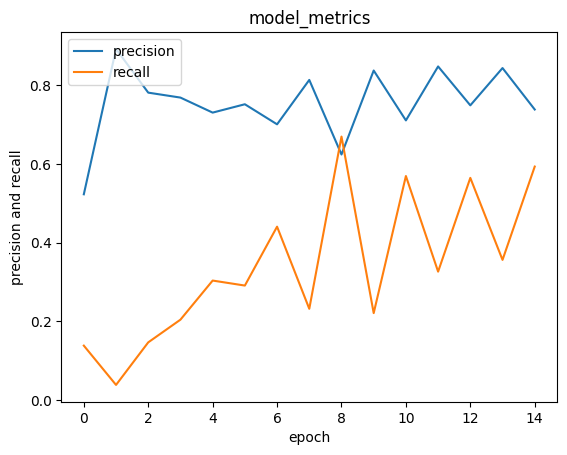

In [76]:
#Plot Precision dan recall dari data train dan test
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model_metrics')
plt.ylabel('precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

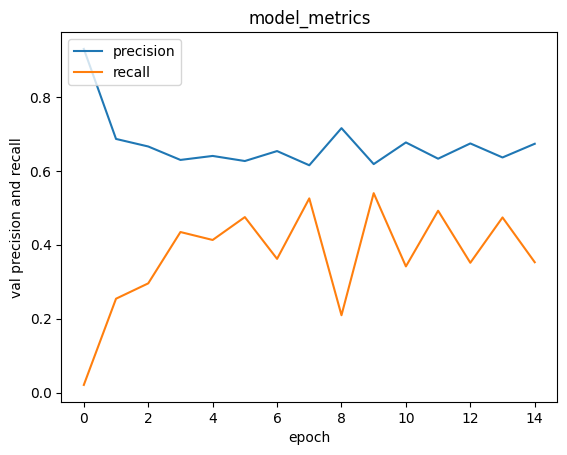

In [77]:
#Plot Val precision dan recall dari data train dan test
plt.plot(history.history['val_precision'])
plt.plot(history.history['val_recall'])
plt.title('model_metrics')
plt.ylabel('val precision and recall')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [72]:
#inisiasi variabel baru
book_df = book_new
# Mengambil sample user
user_id = data.UserId.sample(1).iloc[0]
book_visited_by_user = data[data.UserId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_visited = book_df[~book_df['isbn'].isin(book_visited_by_user.ISBN.values)]['isbn']
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

#
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [73]:
#meratakan data rating untuk diprediksi
ratings = model.predict(user_book_array).flatten()

#top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

#rekomendasi buku
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

#mencari rekomendasi buku berdasarkan rating yang diberikan pengguna
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'rate',
        ascending=False
    )
    .ISBN.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.publisher)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

#rekomendasi buku
recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]
#fungsi perulangan untuk rekomendasi buku sebanyak 10 buah
for row in recommended_book.itertuples():
    print(row.title, ':', row.publisher)

897/897 [==============================] - 1s 1ms/step
Showing recommendations for users: 148744
Book with high ratings from user
--------------------------------
Roses Sing on New Snow: A Delicious Tale : Simon &amp; Schuster
Pagan Babies : HarperTorch
The Bean Trees : Harpercollins
Courting Trouble : HarperCollins Publishers
I Heard It Through the Playground: 616 Best Tips from the Mommy and Daddy Network for Raising a Happy, Healthy Child from Birth to Age Five : Harpercollins
Tears of the Moon : HarperCollins Publishers
The Dispossessed: An Ambiguous Utopia : Eos
The Dancing Floor : HarperTorch
Red, White and Blue : A Novel : HarperTorch
Deal on Ice : HarperTorch
Harriet the Spy : HarperTrophy
Night Lights: Bedtime Stories for Parents in the Dark : Penguin USA
Happy to Be Here : Select Penguin
The Stone Diaries : Penguin Books
Seasons of Splendour (Puffin Story Books) : Puffin Books
Trials of Friendship : St Martins Pr
The Last Lieutenant (Last Lieutenant) : St. Martin's Press
Lie 

## Evaluation

---

Melakukan evaluation terhadap beberapa model algoritma yang digunakan pada tahap modeling

In [74]:
test_loss = model.evaluate(x_val, y_val)
print('\ nTest Loss: {}'.format(test_loss))

1797/1797 [==============================] - 30s 17ms/step - loss: 0.5512 - precision: 0.6698 - recall: 0.3872
\ nTest Loss: [0.5511691570281982, 0.6697814464569092, 0.3872178792953491]


In [75]:
#Define precission and recall value
precision=0.6537
recall=0.3765

#count f_measuer
f_measure=2*(precision*recall)/(precision+recall)
print("F Measure =",f_measure)

F Measure = 0.47780634828188695
